Name Surname:

Student No:

---

Libraries to be used

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter



# Build your own code-base (30 points)

Implement the methods provided and compare your implementation with Sklearn library

---



```
# This is formatted as code
```

K-Nearest Neighbour (5 points)

In [ ]:
class KNN:
  def __init__(self, train_data, train_label, k=3):
    self.k = k
    self.train_data = train_data
    self.train_label = train_label

  def predict(self, test_data):
    predictions = [self._predict(x) for x in test_data]  # Use test_data, not X_test
    return np.array(predictions)

  def _predict(self, x):
    # Compute distances between x and all examples in the training set
    distances = [np.linalg.norm(x - x_train) for x_train in self.train_data]

    # Sort by distance and get indices of the k nearest neighbors
    k_indices = np.argsort(distances)[:self.k]

    # Extract the labels of the k nearest neighbor samples
    k_nearest_labels = [self.train_label[i] for i in k_indices]

    # Return the most common class label
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

[bağlantı metni](https://)Gaussian Naive Bayes (5 points)

In [ ]:
class GNB:
  def __init__(self, train_data, train_label):
    self.train_data = train_data
    self.train_label = train_label
    self.classes = np.unique(train_label)
    self.mean = {}
    self.var = {}
    self.priors = {}

  def gaussian_probability(self, x, c):
    mean = self.mean[c]
    var = self.var[c] + 1e-6  # small constant to avoid division by zero
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent


  def fit(self):
    for c in self.classes:
        x_c = self.train_data[self.train_label == c]
        self.mean[c] = np.mean(x_c, axis=0)
        self.var[c] = np.var(x_c, axis=0)
        self.priors[c] = x_c.shape[0] / self.train_data.shape[0]


  def predict(self, test_data):
    predictions = []
    for x in test_data:
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            conditional = np.sum(np.log(self.gaussian_probability(x, c)))
            posterior = prior + conditional
            posteriors.append(posterior)
        predictions.append(self.classes[np.argmax(posteriors)])
    return np.array(predictions)


[bağlantı metni](https://)Principal Component Analysis (5 points)

In [ ]:
class PCA:
    def __init__(self, data, n_components):
        self.data = data
        self.n_components = n_components

    def fit(self):
        # Mean-center the data
        self.mean = np.mean(self.data, axis=0)
        centered_data = self.data - self.mean

        # Covariance matrix
        covariance_matrix = np.cov(centered_data, rowvar=False)

        # Eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvectors by eigenvalue magnitude (descending order)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvectors = eigenvectors[:, sorted_indices[:self.n_components]]

    def transform(self, X):
        centered_data = X - self.mean
        return np.dot(centered_data, self.eigenvectors)


Metrics (2+3 points)



In [ ]:
def rmse(y_true, y_pred):
  # Calculate the square of the differences
    squared_differences = (y_true - y_pred) ** 2
    # Mean of the squared differences
    mean_squared_error = np.mean(squared_differences)
    # Root of the mean squared error
    return np.sqrt(mean_squared_error)

def accuracyNf1_score(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')  # weighted F1 score for multiclass case
    return accuracy, f1


[bağlantı metni](https://)Visualization Tools (5 points)

In [ ]:

# Visualizing first two features of PCA transformed data
def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data Visualization with PCA')
    plt.show()


Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


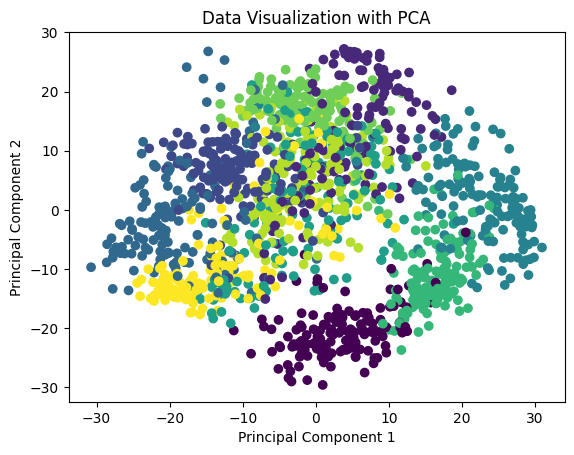

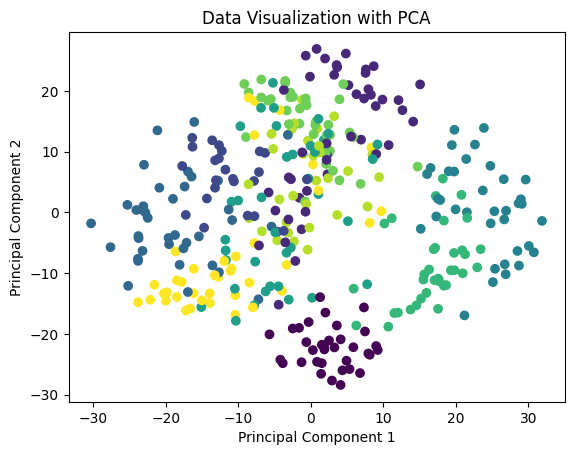

<ipython-input-4-b7e92aa38c8d>:31: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_probability(x, c)))


KNN - Accuracy and F1 Score: (0.9694444444444444, 0.9692966213900052)
Scikit-learn KNN Accuracy: 0.9694444444444444
Scikit-learn KNN F1 Score (macro): 0.9702781572335428
GNB - Accuracy and F1 Score: (0.8777777777777778, 0.8767449120478844)
Scikit-learn GNB Accuracy: 0.8777777777777778
Scikit-learn GNB F1 Score (macro): 0.8775798211325219
Logistic Regression - Accuracy and F1 Score: (0.9666666666666667, 0.9663295814613202)
Scikit-learn Logistic Regression Accuracy: 0.9666666666666667
Scikit-learn Logistic Regression F1 Score (macro): 0.9672797231104207


In [ ]:

# Load dataset and split to train and test set
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=454)

# Initialize PCA with the desired number of components
pca = PCA(n_components=20, data=X_train)

# Fit PCA on the training data
pca.fit()

# Transform the training and testing data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

plot_data(X_train_pca, y_train)
plot_data(X_test_pca, y_test)

# Initialize models
knn = KNN(X_train, y_train, k=5)
gnb = GNB(X_train, y_train)
gnb.fit()


# Predictions
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)


# Results for KNN and GNB
print("KNN - Accuracy and F1 Score:", accuracyNf1_score(y_test, y_pred_knn))
sklearn_accuracy = accuracy_score(y_test, y_pred_knn)
sklearn_f1 = f1_score(y_test, y_pred_knn, average='macro')
print(f"Scikit-learn KNN Accuracy: {sklearn_accuracy}")
print(f"Scikit-learn KNN F1 Score (macro): {sklearn_f1}")

print("GNB - Accuracy and F1 Score:", accuracyNf1_score(y_test, y_pred_gnb))
sklearn_accuracy = accuracy_score(y_test, y_pred_gnb)
sklearn_f1 = f1_score(y_test, y_pred_gnb, average='macro')
print(f"Scikit-learn GNB Accuracy: {sklearn_accuracy}")
print(f"Scikit-learn GNB F1 Score (macro): {sklearn_f1}")

# Use scikit-learn's Logistic Regression for validation
sklearn_model = LogisticRegression(max_iter=10000)
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred)
sklearn_f1 = f1_score(y_test, y_pred, average='macro')
print("Logistic Regression - Accuracy and F1 Score:", accuracyNf1_score(y_test, y_pred))
print(f"Scikit-learn Logistic Regression Accuracy: {sklearn_accuracy}")
print(f"Scikit-learn Logistic Regression F1 Score (macro): {sklearn_f1}")

# Experiments (45 points)

Use Sklearn classes

---

Dataset preparation

In [ ]:
# Load dataset and split to train and test set
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=454)

# Calculate the frequency of each class in the training set
unique_classes_test, class_counts_test = np.unique(y_test, return_counts=True)
unique_classes_train, class_counts_train = np.unique(y_train, return_counts=True)

for cls_train, count_train, cls_test, count_test in zip(unique_classes_train, class_counts_train, unique_classes_test, class_counts_test):
  print(f"Class {cls_train}: {count_train} train  {count_test} test {count_train/count_test} ratio")

Class 0: 144 train  34 test 4.235294117647059 ratio
Class 1: 137 train  45 test 3.0444444444444443 ratio
Class 2: 150 train  27 test 5.555555555555555 ratio
Class 3: 145 train  38 test 3.8157894736842106 ratio
Class 4: 145 train  36 test 4.027777777777778 ratio
Class 5: 144 train  38 test 3.789473684210526 ratio
Class 6: 146 train  35 test 4.171428571428572 ratio
Class 7: 142 train  37 test 3.8378378378378377 ratio
Class 8: 143 train  31 test 4.612903225806452 ratio
Class 9: 141 train  39 test 3.6153846153846154 ratio


Apply classification methods using the dataset directly (10 points)
(paramtre denemeleri tarzı şeyler)

In [ ]:
for k1 in [3, 5, 7, 9]:
    knn = KNN(X_train, y_train, k=k1)
    y_pred = knn.predict(X_test)
    acc, f1 = accuracyNf1_score(y_test, y_pred)
    print(f"KNN (k={k1}) - Accuracy: {acc}, F1 Score: {f1}")

# Experiment with Gaussian Naive Bayes
gnb = GNB(X_train, y_train)
gnb.fit()
y_pred_gnb = gnb.predict(X_test)
acc, f1 = accuracyNf1_score(y_test, y_pred_gnb)
print(f"GNB - Accuracy: {acc}, F1 Score: {f1}")

KNN (k=3) - Accuracy: 0.975, F1 Score: 0.9749800428794209
KNN (k=5) - Accuracy: 0.9694444444444444, F1 Score: 0.9692966213900052
KNN (k=7) - Accuracy: 0.9694444444444444, F1 Score: 0.9693336584270421
KNN (k=9) - Accuracy: 0.9722222222222222, F1 Score: 0.9721864343061338
GNB - Accuracy: 0.8777777777777778, F1 Score: 0.8767449120478844


<ipython-input-4-b7e92aa38c8d>:31: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_probability(x, c)))




```
# Bu, kod olarak biçimlendirilmiştir
```

Apply PCA and find optimal #components with the best recontruction (RMSE) as the objective (10 points)

In [ ]:

rmse_list = []
# Test different numbers of components
print(f"Number of components: { X_train.shape[1]}")
for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(X_train, n_components=n_components)
    pca.fit()  # Fit PCA to training data

    # Transform the data and reconstruct
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    X_train_reconstructed = np.dot(X_train_pca, pca.eigenvectors.T) + pca.mean
    X_test_reconstructed = np.dot(X_test_pca, pca.eigenvectors.T) + pca.mean

    # Compute RMSE for reconstruction error
    rmse_train = np.sqrt(rmse(X_train, X_train_reconstructed))
    rmse_test = np.sqrt(rmse(X_test, X_test_reconstructed))

    # Store RMSE
    rmse_list.append((n_components, rmse_train, rmse_test))

# Find the optimal number of components based on RMSE
optimal_components = min(rmse_list, key=lambda x: x[2])  # Minimize test RMSE
print(f"Optimal number of components: {optimal_components[0]} with RMSE: {optimal_components[2]}")

Number of components: 64
Optimal number of components: 63 with RMSE: 8.384175828403744e-08


Apply PCA class-wise and merge the transformed features (10 points)

(1437, 63)
(360, 63)


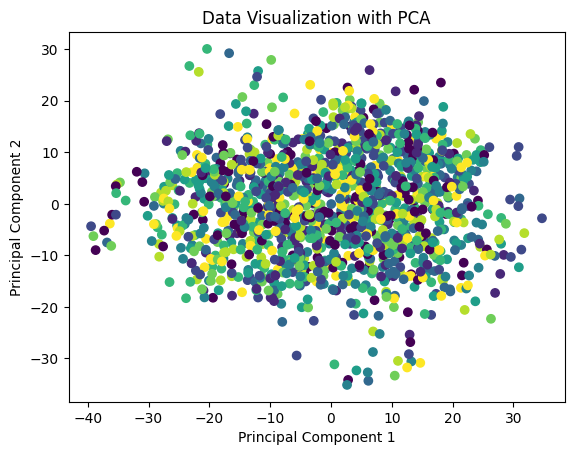

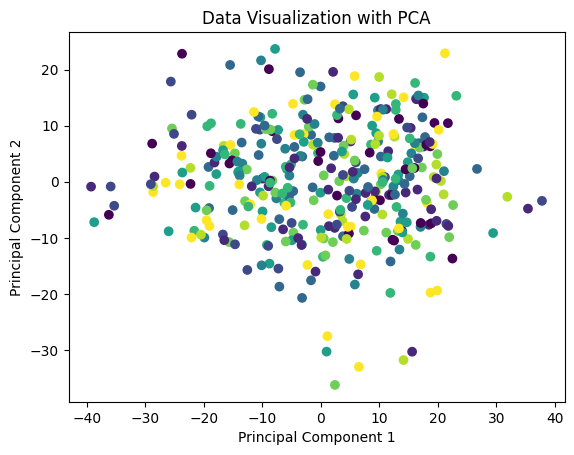

In [ ]:
# Initialize a list to store transformed data from each class
X_train_pca_classwise = []
X_test_pca_classwise = []

# For each unique class, perform PCA
for class_label in np.unique(y_train):
    # Select the data for the current class
    X_train_class = X_train[y_train == class_label]
    X_test_class = X_test[y_test == class_label]

    # Apply PCA
    pca = PCA(X_train_class, n_components=optimal_components[0])
    pca.fit()

    # Transform the data
    X_train_class_pca = pca.transform(X_train_class)
    X_test_class_pca = pca.transform(X_test_class)

    # Add the transformed data to the lists
    X_train_pca_classwise.append(X_train_class_pca)
    X_test_pca_classwise.append(X_test_class_pca)

# Merge all the class-wise PCA-transformed features
X_train_pca_classwise = np.vstack(X_train_pca_classwise)
X_test_pca_classwise = np.vstack(X_test_pca_classwise)

# Now, X_train_pca_classwise and X_test_pca_classwise contain the class-wise PCA-transformed features
print(X_train_pca_classwise.shape)
print(X_test_pca_classwise.shape)


plot_data(X_train_pca_classwise, y_train)
plot_data(X_test_pca_classwise, y_test)

Apply classification methods on the transformed features (PCA outputs) both nomral and class-wise (15 points)
(normal PCA dimension 30, class-wise PCA dimension 3x10)

In [ ]:
# Apply normal PCA with 30 components
pca_normal = PCA(X_train,n_components=30)
pca_normal.fit()
X_train_pca_normal = pca_normal.transform(X_train)
X_test_pca_normal = pca_normal.transform(X_test)

# Train KNN and GNB on class-wise PCA-transformed data
for k1 in [3, 5, 7, 9]:
    knn = KNN(X_train_pca_classwise, y_train, k=k1)
    y_pred = knn.predict(X_test_pca_classwise)
    acc, f1 = accuracyNf1_score(y_test, y_pred)
    print(f"KNN with Class-wise PCA (k={k1}) - Accuracy: {acc}, F1 Score: {f1}")

gnb = GNB(X_train_pca_classwise, y_train)
gnb.fit()
y_pred_gnb_classwise = gnb.predict(X_test_pca_classwise)
acc, f1 = accuracyNf1_score(y_test, y_pred_gnb_classwise)
print(f"GNB with Class-wise PCA  - Accuracy: {acc}, F1 Score: {f1}")

# For class-wise PCA, the logistic regression can be applied as follows:
lr_classwise = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_classwise.fit(X_train_pca_classwise, y_train)
y_pred_lr_classwise = lr_classwise.predict(X_test_pca_classwise)
acc, f1 = accuracyNf1_score(y_test, y_pred_lr_classwise)
print(f"Logistic regresssion with Class-wise PCA  - Accuracy: {acc}, F1 Score: {f1}")


# Train KNN and GNB normal PCAdata
for k1 in [3, 5, 7, 9]:
    knn = KNN(X_train_pca_normal, y_train, k=k1)
    y_pred = knn.predict(X_test_pca_normal)
    acc, f1 = accuracyNf1_score(y_test, y_pred)
    print(f"KNN with Normal PCA (k={k1}) - Accuracy: {acc}, F1 Score: {f1}")

gnb = GNB(X_train_pca_normal, y_train)
gnb.fit()
y_pred_gnb_normal = gnb.predict(X_test_pca_normal)
acc, f1 = accuracyNf1_score(y_test, y_pred_gnb_normal)
print(f"GNB with Normal PCA - Accuracy: {acc}, F1 Score: {f1}")

# For normal PCA, the logistic regression can be applied as follows:
lr_classwise = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_classwise.fit(X_train_pca_normal, y_train)
y_pred_lr_classwise = lr_classwise.predict(X_test_pca_normal)
acc, f1 = accuracyNf1_score(y_test, y_pred_lr_classwise)
print(f"Logistic regresssion with Normal PCA  - Accuracy: {acc}, F1 Score: {f1}")




KNN with Class-wise PCA (k=3) - Accuracy: 0.09722222222222222, F1 Score: 0.0929436786812381
KNN with Class-wise PCA (k=5) - Accuracy: 0.11666666666666667, F1 Score: 0.1134662287593587
KNN with Class-wise PCA (k=7) - Accuracy: 0.1, F1 Score: 0.09480153761297738
KNN with Class-wise PCA (k=9) - Accuracy: 0.09722222222222222, F1 Score: 0.09413256686721638
GNB with Class-wise PCA  - Accuracy: 0.09444444444444444, F1 Score: 0.08406272572812849


<ipython-input-4-b7e92aa38c8d>:31: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_probability(x, c)))


Logistic regresssion with Class-wise PCA  - Accuracy: 0.09166666666666666, F1 Score: 0.0864478434114327
KNN with Normal PCA (k=3) - Accuracy: 0.975, F1 Score: 0.9749800428794209
KNN with Normal PCA (k=5) - Accuracy: 0.9694444444444444, F1 Score: 0.9692966213900052
KNN with Normal PCA (k=7) - Accuracy: 0.9694444444444444, F1 Score: 0.9692980643914482
KNN with Normal PCA (k=9) - Accuracy: 0.9722222222222222, F1 Score: 0.9722580517057975
GNB with Normal PCA - Accuracy: 0.9472222222222222, F1 Score: 0.9472727632263714
Logistic regresssion with Normal PCA  - Accuracy: 0.9583333333333334, F1 Score: 0.9577249102517246
